In [1]:
# Importa la libreria 
import nltk
# Descarga paquetes adicionales

In [2]:
pip install inflect

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Punkt permite separar un texto en frases.
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gabycaballero/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gabycaballero/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gabycaballero/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
# Importación de librerias
seed = 161
import pandas as pd
import numpy as np
import sys
from pandas_profiling import ProfileReport
!pip install contractions
import contractions
import re, string, unicodedata

import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, plot_precision_recall_curve
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt


#Para el modelo de clasificación
# Para preparar los datos
# ------------------------
from sklearn import tree as tr
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 

#importa KFold
from sklearn.model_selection import KFold

#importa el modelo SVM

from sklearn import svm


#Librerías para la visualización
# -------------------------
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 


In [7]:
#Actualiza pandas
!pip install pandas --upgrade

In [8]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('kindle_reviews.csv', sep=',', encoding = 'utf-8', index_col=0, nrows=10000)
# Asignación a una nueva variable de los datos leidos
data_t=data
data_t.sample(10)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
4725,B002BWPDYS,"[1, 1]",4,"A sardonic parody of spy adventures, that isn'...","05 22, 2012",A39I3A6HUG5ZVO,Cici,Modern Keystone Kops,1337644800
3328,B001V5JK9A,"[0, 0]",4,Start at the 1st book in this series and you'l...,"03 31, 2013",A20FOSDIWU5KRD,Beth M. Fuller,I like it,1364688000
4378,B002A4MIDQ,"[0, 2]",4,"I read this one and thought it was good, not a...","11 7, 2010",A28VGN6IJA6ZUO,"Teresa Tio ""sometimes fluff is important""","Enjoyable Read, Loved the Norse Gods!",1289088000
4877,B002D48NBO,"[3, 3]",5,"While reading this book, I didn't find myself ...","10 30, 2012",A1SO69S1AS9TZ7,"C.J. Williams ""&#34;Attempting to Balance Lif...",Love it while on a train ride to NY,1351555200
6725,B002NOGE4M,"[1, 1]",5,i loved it! i am writing this from my kindle b...,"03 15, 2010",A2F8Z0D1X2FBFP,"D. Rowe ""kindle lover""",bravo!,1268611200
1604,B001892DK2,"[1, 3]",2,"This book started off interestingly enough, wh...","08 5, 2009",A2GHKTUUITHJYB,"bklvr ""susan""",Actually 2 1/2 stars,1249430400
9830,B0030MQIR4,"[3, 4]",5,"I thought it was a wonderfully written, hawt r...","03 16, 2011",AL2F5SD1B0P8K,Kate Eliz,"Short, hawt read",1300233600
5186,B002E7ARKK,"[11, 15]",1,I decided to try this book since it was free o...,"02 26, 2010",A17J0MBCTL5J11,P. Fox,A short story,1267142400
7587,B002SB9ZCI,"[0, 1]",3,I've read more interesting F/F stories but it ...,"12 7, 2012",A1DM7TCXWBNBDP,Joanne O'Neil,OK,1354838400
9921,B0030N6DV4,"[0, 0]",5,Thank you Lena. I loved this story. It's great...,"10 10, 2012",A2C4RUNZU66XC2,Valencia,Georgia Peach for sure!,1349827200


In [9]:
data_t.shape


(10000, 9)

In [10]:
data_t.dtypes

asin              object
helpful           object
overall            int64
reviewText        object
reviewTime        object
reviewerID        object
reviewerName      object
summary           object
unixReviewTime     int64
dtype: object

In [11]:
data_t["reviewText"]=data_t["reviewText"].astype(str)

In [13]:
textos = data_t.copy()
textos['Conteo'] = [len(x) for x in textos['reviewText']]
textos['Moda'] = [max(set(x.split(' ')), key = x.split(' ').count) for x in textos['reviewText']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['reviewText']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['reviewText']]
textos.sample(10)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Conteo,Moda,Max,Min
3906,B00264H2VI,"[0, 0]",3,The first half was good with the short stories...,"09 6, 2013",A1BXXIAROOQYNF,Travis,Good for half the book,1378425600,97,that,7,1
9518,B0030CML9S,"[2, 2]",5,Wow! This is one story that I didn't think I'd...,"01 25, 2013",A1H3S85JCPDZ32,JacquieMT,Wow so different,1359072000,893,to,11,1
4288,B00295R188,"[0, 1]",5,Funny story The author might not intentionally...,"08 10, 2013",A2PM7K9S8NJ69K,James Flint,Ok Gilbert berm me up.,1376092800,186,a,13,1
8542,B002WEPD7W,"[0, 0]",4,"This book had the potential of being great, to...","10 20, 2011",A2BMNWCFZXZ4ZS,Blessed,"Good Book, But Not Great",1319068800,216,have,13,0
2909,B001Q3KT1K,"[3, 3]",4,Rating: 4.5 starsThis book was a dark read an...,"11 26, 2012",A31GEEKEZR7E5I,The Book Enthusiast,A Dark Erotic and Physiological Story,1353888000,1553,and,14,0
578,B000R93D4Y,"[3, 6]",1,Thank God this was free because it was so terr...,"06 26, 2013",A1OZ2ODY0K67KD,Alex,One word: horrible,1372204800,704,is,11,1
6448,B002L3RUFC,"[0, 0]",5,I loved this book from beginning to end. Hopef...,"05 29, 2012",A3IQ0P3M39IY8U,CINDY F.,Loved this book!,1338249600,955,to,16,1
9435,B0030CMJEK,"[0, 0]",4,This was damn near everything that I needed it...,"12 13, 2012",A2IKDJBPGCY19V,seraphcelene,Teh Hotness!,1355356800,2093,the,21,1
2400,B001GPOO64,"[1, 1]",5,"I Love This Book!!! It is sexy, sensual, funny...","04 16, 2014",A3E258BRKRVCQY,ECH,SEXY!!!!,1397606400,188,I,14,1
4015,B0026REA92,"[0, 0]",5,Confession: I judged this book by the cover. B...,"08 1, 2013",A12GGS9S147WCM,Sasha Van Baerle,Ready for more,1375315200,373,the,13,1


In [ ]:
!pip install pandas==1.3.3



In [ ]:
# Se realiza un perfilamiento de los datos con la libre pandas profiling
#ProfileReport(textos)* Poner pantallazos de Jupyter

# Nota: Este comando puede generar el siguiente error: 
# ImportError: cannot import name 'ABCIndexClass' from 'pandas.core.dtypes.generic'
# Para solucionarlo, basta instalar cualquie version 1.2.x de Pandas: 

# Limpieza de datos

In [14]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
      new_word = word.lower()
      new_words.append(new_word)
    return new_words


data_copy = data_t.copy()

data_copy['reviewText'] = data_copy['reviewText'].apply(to_lowercase)

  
    

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words


def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

In [15]:
# def to_lowercase(words):
#     """Convert all characters to lowercase from list of tokenized words"""
#     new_words = []
#     for word in words:
#       new_word = word.lower()
#       new_words.append(new_word)
#     return new_words


# data_copy = data_t.copy()

# data_copy['reviewText'] = data_copy.apply(lambda row: to_lowercase(row), axis = 1)

# data_copy['reviewText'].head()



# Tokenización


In [16]:
import contractions

data_t['reviewText'] = data_t['reviewText'].apply(contractions.fix) #Aplica la corrección de las contracciones

In [17]:
data_t['words'] = data_t['reviewText'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido
data_t.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,words
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,"[enjoy, vintage, books, movies, enjoyed, readi..."
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,"[book, reissue, old, one, author, born, 1910, ..."
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,"[fairly, interesting, read, old, style, termin..."
3,B000F83SZQ,"[1, 1]",5,I would never read any of the Amy Brewster mys...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,"[would, never, read, amy, brewster, mysteries,..."
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,"[like, period, pieces, clothing, lingo, enjoy,..."


# Normalización


In [18]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

data_t['words'] = data_t['words'].apply(stem_and_lemmatize) 
data_t.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,words
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,"[enjoy, vint, book, movy, enjoy, read, book, p..."
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,"[book, reissu, old, on, auth, born, 1910, er, ..."
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,"[fair, interest, read, old, styl, terminology,..."
3,B000F83SZQ,"[1, 1]",5,I would never read any of the Amy Brewster mys...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,"[would, nev, read, amy, brewst, mystery, on, r..."
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,"[lik, period, piec, cloth, lingo, enjoy, myste..."


In [19]:
data_t['processed_message'] = data_t['words'].apply(lambda x: ' '.join(map(str, x)))
data_t

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,words,processed_message
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,"[enjoy, vint, book, movy, enjoy, read, book, p...",enjoy vint book movy enjoy read book plot unus...
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,"[book, reissu, old, on, auth, born, 1910, er, ...",book reissu old on auth born 1910 er say nero ...
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,"[fair, interest, read, old, styl, terminology,...",fair interest read old styl terminology glad g...
3,B000F83SZQ,"[1, 1]",5,I would never read any of the Amy Brewster mys...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,"[would, nev, read, amy, brewst, mystery, on, r...",would nev read amy brewst mystery on real hook...
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,"[lik, period, piec, cloth, lingo, enjoy, myste...",lik period piec cloth lingo enjoy mystery auth...
...,...,...,...,...,...,...,...,...,...,...,...
9995,B0030ZRWW6,"[1, 5]",5,I am now half way through the 1st Book of the ...,"06 14, 2011",AR9JVVLDADZFF,T. Fruge,A Refreshing Revival of a Classic Style!,1308009600,"[half, way, 1st, book, delv, mag, sery, lov, r...",half way 1st book delv mag sery lov return ad ...
9996,B0030ZRWW6,"[0, 0]",5,If you love the underdog (and I do) read the D...,"08 27, 2012",A3TC982M87DQLO,"The Arkenstone ""Village Witch""",Grat Series!,1346025600,"[lov, underdog, read, delv, sery, wel, writ, b...",lov underdog read delv sery wel writ book flow...
9997,B0030ZRWW6,"[0, 0]",4,"I love these books. Yes, they can be a bit to...","08 19, 2012",A1TMFRRJUMWWYS,"Tiffiny Sarradet ""To learn is to live""","GREAT stories, PLEASE get an editor!",1345334400,"[lov, book, ye, bit, pat, tim, charact, pretty...",lov book ye bit pat tim charact pretty predict...
9998,B0030ZRWW6,"[0, 0]",5,I am reading it now. do not know why I waited...,"01 21, 2013",A3RRPAUD188REK,Timothy E. Winsley,good book.,1358726400,"[read, know, wait, long, read, good, read, say...",read know wait long read good read say read kn...


In [20]:
# a partir del arreglo que se encuentra en la columna helpful se obtiene un numero que lo representa.
#en este sentido, [2,3] = 2/3 = 0.667

def calcularHelpful(array):
  numerador = int(array[0])
  denominador = int(array[1])
  if(denominador == 0 & numerador == 0):
    return 0
  else:
    return float(numerador/denominador)



In [21]:
data_test = data_t.copy()


In [22]:
#reviso que todo este bien
data_test.iloc[9995]

asin                                                        B0030ZRWW6
helpful                                                         [1, 5]
overall                                                              5
reviewText           I am now half way through the 1st Book of the ...
reviewTime                                                 06 14, 2011
reviewerID                                               AR9JVVLDADZFF
reviewerName                                                  T. Fruge
summary                       A Refreshing Revival of a Classic Style!
unixReviewTime                                              1308009600
words                [half, way, 1st, book, delv, mag, sery, lov, r...
processed_message    half way 1st book delv mag sery lov return ad ...
Name: 9995, dtype: object

In [23]:
#proceso la información de helpful
data_test['helpful_chevere'] = data_test.helpful.apply(lambda x: x.replace(' ',''))
data_test['helpful_chevere'] = data_test.helpful_chevere.apply(lambda x: x[1:-1].split(','))

In [24]:
data_test['helpful_chevere'][9995][1]

'5'

In [25]:
int(data_test['helpful_chevere'][9995][1])

5

In [26]:
data_test['helpful_calculado'] = data_test.helpful_chevere.apply(lambda s:  calcularHelpful(s))

In [27]:
#X_data, y_data = data_t['processed_message'],data_t['reviewText']
X_data, y_data = data_test['processed_message'],data_test['helpful_calculado']
y_data = (y_data >= 0.5).astype(int)
y_data

0       0
1       1
2       1
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: helpful_calculado, Length: 10000, dtype: int64

In [28]:
print(pd.__version__) 


1.3.3


In [102]:
df = data_test.copy()

In [103]:
df['helpful_calculado'] =  (df['helpful_calculado'] >= 0.5).astype(int)

In [104]:
# saving as a CSV file
df.to_csv('datos-.csv', sep ='\t')

In [29]:
# X_data, y_data = data_t['processed_message'],data_t['helpful']
# #X_data, y_data = data_t['processed_message'],data_t['helpful']
# y_data = (y_data == 'helpful').astype(int)
# y_data

# Representación en matriz de conteo



In [30]:
count = CountVectorizer()
X_count = count.fit_transform(X_data)
print(X_count.shape)
X_count.toarray()[0]

(10000, 43071)


array([0, 0, 0, ..., 0, 0, 0])

matriz binaria

In [31]:
vectorizer = HashingVectorizer(n_features=2**4)
X_bin = vectorizer.fit_transform(X_data)
print(X_bin.shape)
#.toarray()[0]

(10000, 16)


In [32]:
X_bin.todense()

matrix([[-0.09128709,  0.36514837, -0.09128709, ...,  0.18257419,
          0.63900965, -0.36514837],
        [-0.13736056,  0.20604085,  0.        , ...,  0.        ,
          0.48076197,  0.        ],
        [-0.08512565, -0.08512565,  0.34050261, ..., -0.17025131,
          0.17025131, -0.34050261],
        ...,
        [-0.29793979,  0.17025131, -0.04256283, ...,  0.34050261,
          0.12768848, -0.34050261],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        , -0.81649658],
        [-0.05345225, -0.1069045 ,  0.05345225, ...,  0.        ,
          0.74833148,  0.16035675]])

Matriz TF-ID

In [33]:
vectorizer = TfidfVectorizer()
X_TIFID = vectorizer.fit_transform(X_data)
vectorizer.get_feature_names()[96]

'1890'

In [34]:
X_TIFID.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

# Modelo de clasificación

In [35]:
#Dividir las variables de entrenamiento

X = X_count
#Variable objetivo
Y = y_data


# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Decision Tree Classifier

In [36]:
arbol = DecisionTreeClassifier(criterion = 'gini', max_depth = 8)

In [37]:
arbol = arbol.fit(X= X_train, y = Y_train)

In [38]:
#https://ai.plainenglish.io/hyperparameter-tuning-of-decision-tree-classifier-using-gridsearchcv-2a6ebcaffeda
param_dict = {
    "criterion":['gini','entropy'],
    "max_depth": range(1,10),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
}

In [40]:
grid = GridSearchCV(
                    arbol,
                    param_grid = param_dict,
                    cv = 10,
                    verbose = 1,
                    n_jobs = 1
)
grid.fit(X_test, Y_test)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=8), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [41]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 9}

In [43]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4,
                       min_samples_split=9)

In [44]:
grid.best_score_

0.6505

In [79]:
arbol = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4,
                       min_samples_split=9)

In [80]:
arbol = arbol.fit(X= X_train, y = Y_train)

In [81]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = arbol.predict(X_test)

In [87]:
#MAtriz de confusión
confusion_matrix(Y_test, y_pred)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76      1218
           1       0.63      0.25      0.35       782

    accuracy                           0.65      2000
   macro avg       0.64      0.58      0.56      2000
weighted avg       0.64      0.65      0.60      2000



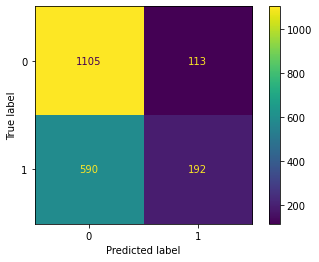

In [88]:
# Grafica la matriz de confusión
plot_confusion_matrix(arbol, X_test, Y_test)  
plt.show()

In [89]:
f1_score(y_true = Y_test, y_pred = y_pred)

0.35326586936522536

In [90]:
# Mostrar reporte de clasificación


print('Train')
print(classification_report(Y_train, y_pred_train))
print("------------")
print('Test')
print(classification_report(Y_test, y_pred_test))

Train
              precision    recall  f1-score   support

           0       0.69      0.94      0.79      4941
           1       0.75      0.31      0.44      3059

    accuracy                           0.70      8000
   macro avg       0.72      0.62      0.62      8000
weighted avg       0.71      0.70      0.66      8000

------------
Test
              precision    recall  f1-score   support

           0       0.65      0.91      0.76      1218
           1       0.63      0.25      0.35       782

    accuracy                           0.65      2000
   macro avg       0.64      0.58      0.56      2000
weighted avg       0.64      0.65      0.60      2000



In [86]:
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print('Exactitud sobre entrenamiento: %.3f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.3f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.696
Exactitud sobre test: 0.648


# KNN Classifier

In [51]:
#number_cols = data_t.dtypes[(data_t.dtypes == np.int64) | (data_t.dtypes == np.float64)].index 
#number_cols = data_t.select_dtypes(include = ['int64','float']).columns
#number_cols

In [52]:
#data_m = data_t['number_cols']

In [53]:
#Normalización de datos
#normalized_df = (data_m - data_m.min())/(data_m.max() - data_m.min())
#normalized_df.describe()

In [91]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

k = KFold(shuffle=True, random_state = seed)
# Lista de Hiperparámetros a afinar
n_neighbors = list(range(1,10))
p=[1,2] #Función de distancia 1: manhattan, 2: euclidean, otro valor: minkowski

#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
mejor_modelo_knn = GridSearchCV(knn_2, hyperparameters, cv=k)

#Fit the model
mejor_modelo_knn.fit(X_train, Y_train)

#Print The value of best Hyperparameters
print('Best p:', mejor_modelo_knn.best_estimator_.get_params()['p'])
print('Best n_neighbors:', mejor_modelo_knn.best_estimator_.get_params()['n_neighbors'])

# Obtener el mejor modelo.
neigh_final = mejor_modelo_knn.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = neigh_final.predict(X_train)
y_pred_test = neigh_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Best p: 2
Best n_neighbors: 5
Exactitud sobre entrenamiento: 0.69
Exactitud sobre test: 0.62


In [93]:

#Y = data_t['helpful']
#X = data_t.drop(['helpful', 'helpful'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
neigh = KNeighborsClassifier(n_neighbors=5,p = 2)
neigh = neigh.fit(X_train, Y_train) 
y_pred = neigh.predict(X_test) 

#Matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[1161,   57],
       [ 711,   71]])

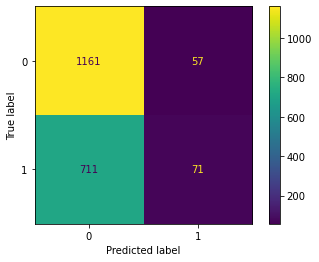

In [94]:
# Grafica la matriz de confusión
plot_confusion_matrix(neigh, X_test, Y_test)  
plt.show()

In [95]:
# Mostrar reporte de clasificación


print('Train')
print(classification_report(Y_train, y_pred_train))
print("------------")
print('Test')
print(classification_report(Y_test, y_pred_test))

#print("F1 Score:")
#f1_score(y_true = Y_test, y_pred = y_pred)

Train
              precision    recall  f1-score   support

           0       0.67      0.98      0.80      4941
           1       0.87      0.22      0.35      3059

    accuracy                           0.69      8000
   macro avg       0.77      0.60      0.57      8000
weighted avg       0.75      0.69      0.63      8000

------------
Test
              precision    recall  f1-score   support

           0       0.62      0.95      0.75      1218
           1       0.55      0.09      0.16       782

    accuracy                           0.62      2000
   macro avg       0.59      0.52      0.45      2000
weighted avg       0.59      0.62      0.52      2000



In [96]:
print("F1-Score:")
f1_score(y_true = Y_test, y_pred = y_pred)

F1-Score:


0.15604395604395604

# SVC Classifier

en primer lugar se hace una búsqueda de hiperperámetros usando KFold

In [58]:
particiones = KFold(n_splits=10, shuffle=True, random_state = seed)

In [59]:
#se establece el espacio de busqueda
param_grid = {'kernel':['linear', 'poly','rbf']}

In [60]:
# se establece el modelo
# from sklearn.svm import LinearSVC
#  from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_classification
# clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
clf = svm.SVC()

In [61]:
best_model = GridSearchCV(clf, param_grid, cv = particiones)

In [63]:
#se entrena el modelo
best_model.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=161, shuffle=True),
             estimator=SVC(), param_grid={'kernel': ['linear', 'poly', 'rbf']})

In [64]:
#la eleccion de hiperparámetros que mejor funcionan con el modelo
best_model.best_params_

{'kernel': 'rbf'}

In [65]:
final_SVC = best_model.best_estimator_

**Reporte de Metricas a Negocio**

In [66]:
y_pred_train = final_SVC.predict(X_train)
y_pred_test = final_SVC.predict(X_test)
print('Exactitud sobre entrenamiento: %.3f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.3f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.830
Exactitud sobre test: 0.674


F1 score

In [67]:
print('Train')
print(classification_report(Y_train, y_pred_train))
print("------------")
print('Test')
print(classification_report(Y_test, y_pred_test))

Train
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4941
           1       1.00      0.56      0.71      3059

    accuracy                           0.83      8000
   macro avg       0.89      0.78      0.80      8000
weighted avg       0.87      0.83      0.82      8000

------------
Test
              precision    recall  f1-score   support

           0       0.68      0.87      0.76      1218
           1       0.64      0.37      0.47       782

    accuracy                           0.67      2000
   macro avg       0.66      0.62      0.62      2000
weighted avg       0.67      0.67      0.65      2000



In [68]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred_test)

array([[1056,  162],
       [ 489,  293]])

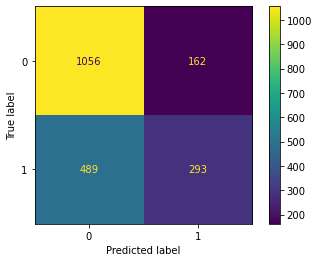

In [69]:
plot_confusion_matrix(final_SVC, X_test, Y_test)  
plt.show()  

In [ ]:
# #grafica representando los resultados del modelo sobre el set de datos
# #codigo tomado de: https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

# print(__doc__)

# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn import svm, datasets


# # create a mesh to plot in
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# # title for the plots
# titles = ['SVC with polynomial (degree 3) kernel']


# for i, clf in enumerate((svc, final_SVC)):
#     # Plot the decision boundary. For that, we will assign a color to each
#     # point in the mesh [x_min, x_max]x[y_min, y_max].
#     plt.subplot(2, 2, 1)
#     plt.subplots_adjust(wspace=0.001, hspace=0.001)

#     Z = final_SVC.predict(np.c_[xx.ravel(), yy.ravel()])

#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

#     # Plot also the training points
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
#     plt.xlabel('Sepal length')
#     plt.ylabel('Sepal width')
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.xticks(())
#     plt.yticks(())
#     plt.title(titles[0])

# plt.show()